# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from seaborn import set_context

set_context("talk")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Load Data

In [2]:
df = pd.read_csv('../Data Mining/dataset/data.csv')

In [3]:
df.head()

,order_delivered_date,customer_id,gender,max_age,state_name,district_name,order_id,client_type,payment_method_name,supplier_name,stock_location_name,line_item_promotion_source,line_item_buy_x_quantity,line_item_get_y_quantity,total_promotion_adjustment_amount,sku,brand,product_name,product_size,product_unit,product_hierarchy_1,product_hierarchy_3,product_normal_price,delivered_quantity,final_price,order_promotion_source,order_cc_promotion_source,order_fd_promotion_id,order_fd_promotion_source,product_package,product_unit_pieces,order_promotion_voucher_amount,Variant,Sub Brand,Brand,Subcat 4,Subcat 3,Subcat 2,Subcat 1,Category,Keterangan,year,month,brand_key
0,2018-04-01,555531,F,44,Jakarta Utara,Penjaringan,3885076,webapp,Adyen HPP_ID,Carrefour,Carrefour Pluit Village,NaN,NaN,NaN,0.0,8998103014388-ID,Cussons,Cussons Baby Wipes Fresh and Nourish,1.0,packet,babies_&_toddlers,skin_&_body_care,16800.0,1,16800.0,NaN,BANK,2131188,MARKETING,50.0,50.0,0.00,Cussons Baby Wipes Fresh and Nourish,Cussons Baby Wipes,Cussons,Fresh and Nourish,Baby Cleansing Wipes,Wipes,Diapers & Wipes,Baby,NaN,2018,4,cussons
1,2018-04-01,175909,F,-1,Jakarta Selatan,Jagakarsa,4951986,android,Adyen HPP_ID,Grand Lucky,Grand Lucky Cinere,NaN,NaN,NaN,0.0,8991002105676-ID,Kapal Api,Kapal Api Powdered Milk Coffee,31.0,g,beverages,coffee_ready_mix,12700.0,1,12700.0,MARKETING,NaN,0,NaN,10.0,10.0,-56687.34,Kapal Api Powdered Milk Coffee,Kapal Api Milk Coffee,Kapal Api,Coffee + Sugar + Milk,3 in 1,Instant,Coffee,Beverages,NaN,2018,4,kapal_api
2,2018-04-01,270163,NaN,-1,Jakarta Pusat,Tanah Abang,4565982,ios,COD,Lotte Mart,LOTTE Mart Kuningan City,NaN,NaN,NaN,0.0,8999999016128-ID,Rinso,Rinso plus Molto Advance Foam Liquid Laundry D...,800.0,ml,household,washing_detergent,15300.0,1,15300.0,NaN,NaN,0,NaN,1.0,1.0,0.00,Rinso Detergent + Molto Advance Foam Pink,Rinso Molto,Rinso,Pink,Powder Detergent,Detergent,Laundry,Home Care,NaN,2018,4,rinso
3,2018-04-01,574568,F,34,Jakarta Selatan,Jagakarsa,4909903,android,Adyen HPP_ID,Super Indo,Super Indo Cinere,NaN,NaN,NaN,0.0,8999999500665-ID,Rinso,Rinso plus Molto Powder Laundry Detergent,1.8,kg,household,washing_detergent,28700.0,1,28700.0,NaN,BANK,0,NaN,1.0,1.0,0.00,Rinso Detergent + Molto,Rinso Molto,Rinso,Ultra 2 In 1,Powder Detergent,Detergent,Laundry,Home Care,NaN,2018,4,rinso
4,2018-04-01,366305,F,-1,Jakarta Pusat,Tanah Abang,2301357,default,Adyen HPP_ID,Lotte Mart,LOTTE Mart Kuningan City,NaN,NaN,NaN,0.0,8991002105676-ID,Kapal Api,Kapal Api Powdered Milk Coffee,31.0,g,beverages,coffee_ready_mix,14100.0,1,14100.0,NaN,NaN,0,NaN,10.0,10.0,0.00,Kapal Api Powdered Milk Coffee,Kapal Api Milk Coffee,Kapal Api,Coffee + Sugar + Milk,3 in 1,Instant,Coffee,Beverages,NaN,2018,4,kapal_api


In [4]:
df_new = df[['order_delivered_date','customer_id','gender','max_age','state_name','order_id',
         'client_type','supplier_name','sku','brand','product_name','product_size','product_unit',
         'product_normal_price','delivered_quantity','final_price','Brand','Category','year','month']]

In [5]:
df_new.head()

,order_delivered_date,customer_id,gender,max_age,state_name,order_id,client_type,supplier_name,sku,brand,product_name,product_size,product_unit,product_normal_price,delivered_quantity,final_price,Brand,Category,year,month
0,2018-04-01,555531,F,44,Jakarta Utara,3885076,webapp,Carrefour,8998103014388-ID,Cussons,Cussons Baby Wipes Fresh and Nourish,1.0,packet,16800.0,1,16800.0,Cussons,Baby,2018,4
1,2018-04-01,175909,F,-1,Jakarta Selatan,4951986,android,Grand Lucky,8991002105676-ID,Kapal Api,Kapal Api Powdered Milk Coffee,31.0,g,12700.0,1,12700.0,Kapal Api,Beverages,2018,4
2,2018-04-01,270163,NaN,-1,Jakarta Pusat,4565982,ios,Lotte Mart,8999999016128-ID,Rinso,Rinso plus Molto Advance Foam Liquid Laundry D...,800.0,ml,15300.0,1,15300.0,Rinso,Home Care,2018,4
3,2018-04-01,574568,F,34,Jakarta Selatan,4909903,android,Super Indo,8999999500665-ID,Rinso,Rinso plus Molto Powder Laundry Detergent,1.8,kg,28700.0,1,28700.0,Rinso,Home Care,2018,4
4,2018-04-01,366305,F,-1,Jakarta Pusat,2301357,default,Lotte Mart,8991002105676-ID,Kapal Api,Kapal Api Powdered Milk Coffee,31.0,g,14100.0,1,14100.0,Kapal Api,Beverages,2018,4


# Buat dataframe untuk tanggal

In [6]:
date = pd.DataFrame(pd.date_range(start=df_new['order_delivered_date'].min(),end=df_new['order_delivered_date'].max()), 
                    columns={"date"})
date['month'] = date['date'].dt.month
date['year'] = date['date'].dt.year
date['dummy'] = 1
date.head(5)

,date,month,year,dummy
0,2018-04-01,4,2018,1
1,2018-04-02,4,2018,1
2,2018-04-03,4,2018,1
3,2018-04-04,4,2018,1
4,2018-04-05,4,2018,1


_Karena saya ingin menganalisa berdasarkan bulan dan tahun, jadi week dan day tidak diperlukan pada dataframe tanggal_

In [7]:
date.shape

(364, 4)

# Buat Dataframe untuk Category-Brand

In [8]:
catbrand = df[['Category','Brand']].drop_duplicates()
catbrand['dummy'] = 1
catbrand.head(5)

,Category,Brand,dummy
0,Baby,Cussons,1
1,Beverages,Kapal Api,1
2,Home Care,Rinso,1
5,Home Care,Attack,1
7,Home Care,SoKlin,1


In [9]:
catbrand.shape

(134, 3)

_Kenapa membutuhkan kolom dummy? Karena nantinya tabel akan digabungkan (merge) berdasarkan dummy tersebut._

# Eksplorasi Data Awal

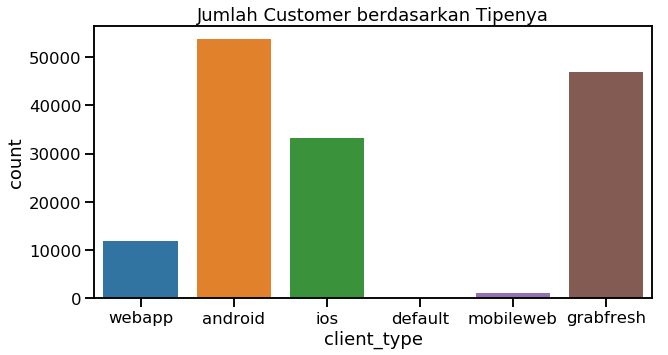

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Jumlah Customer berdasarkan Tipenya')
sns.countplot(df_new['client_type'],data=df_new)

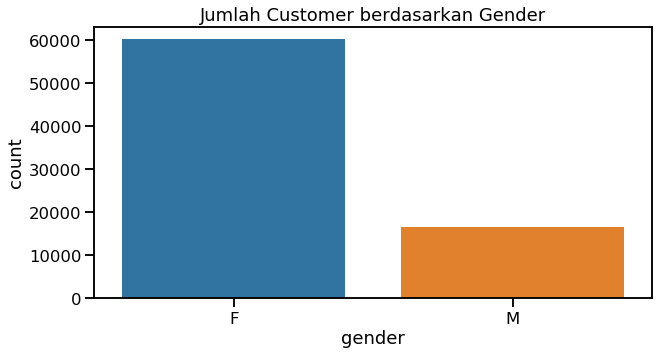

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Jumlah Customer berdasarkan Gender')
sns.countplot(df_new['gender'],data=df_new)

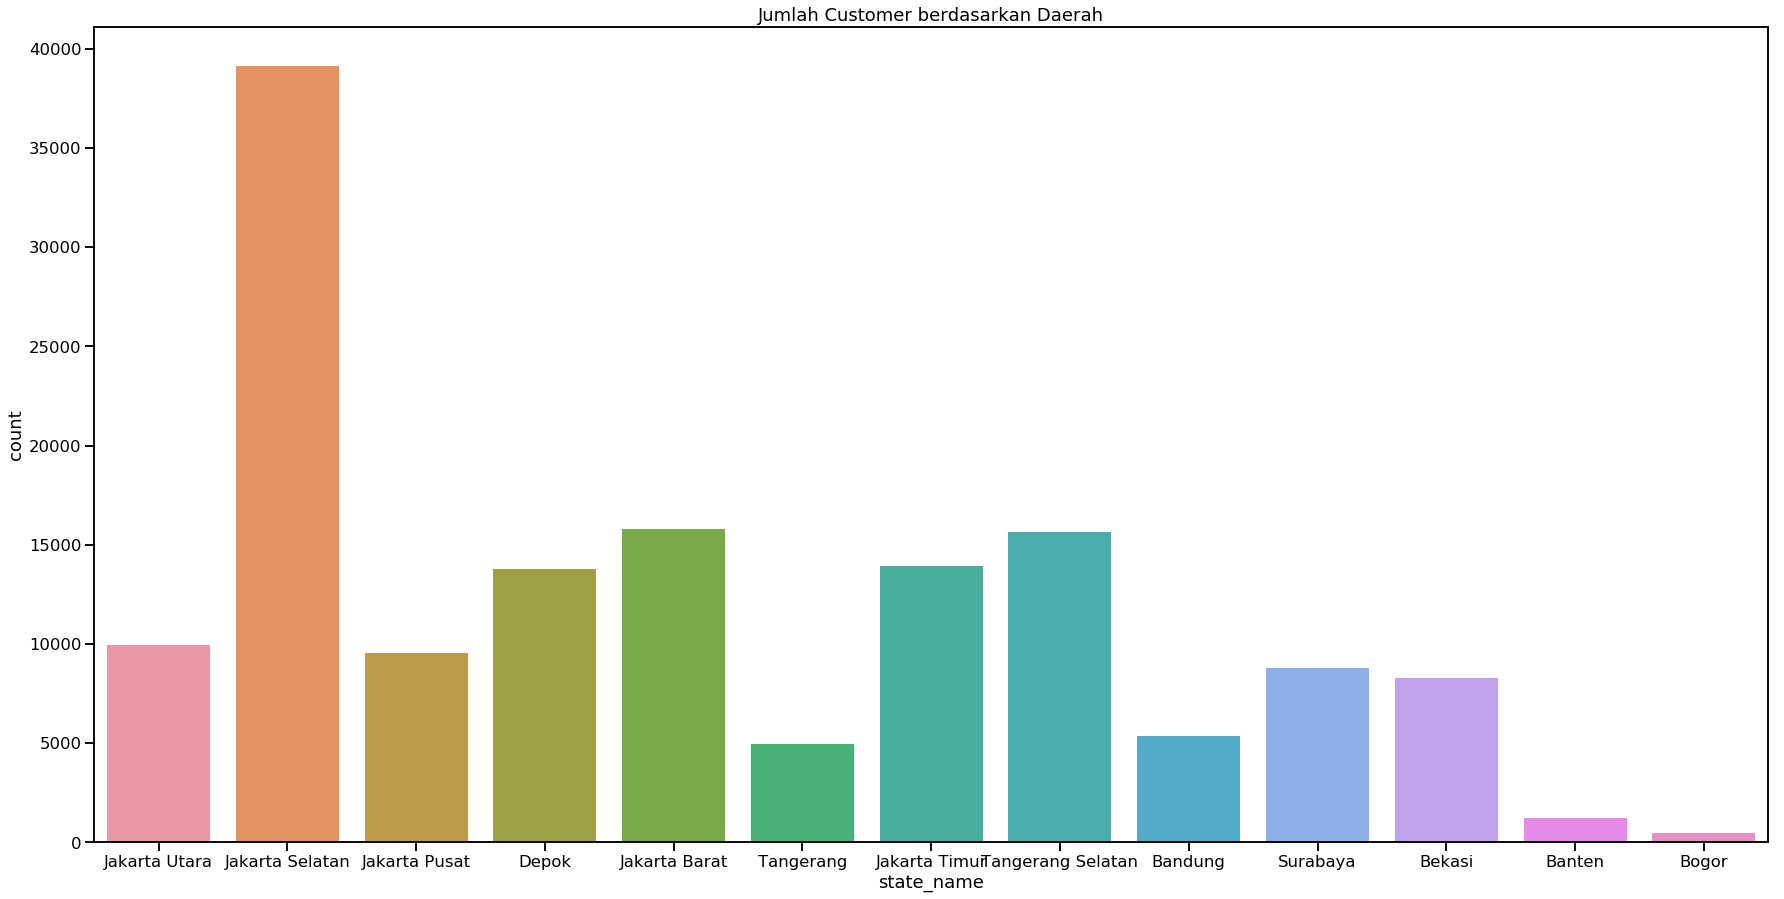

In [12]:
fig, ax = plt.subplots(figsize=(30, 15))
plt.title('Jumlah Customer berdasarkan Daerah')
sns.countplot(df_new['state_name'],data=df_new)

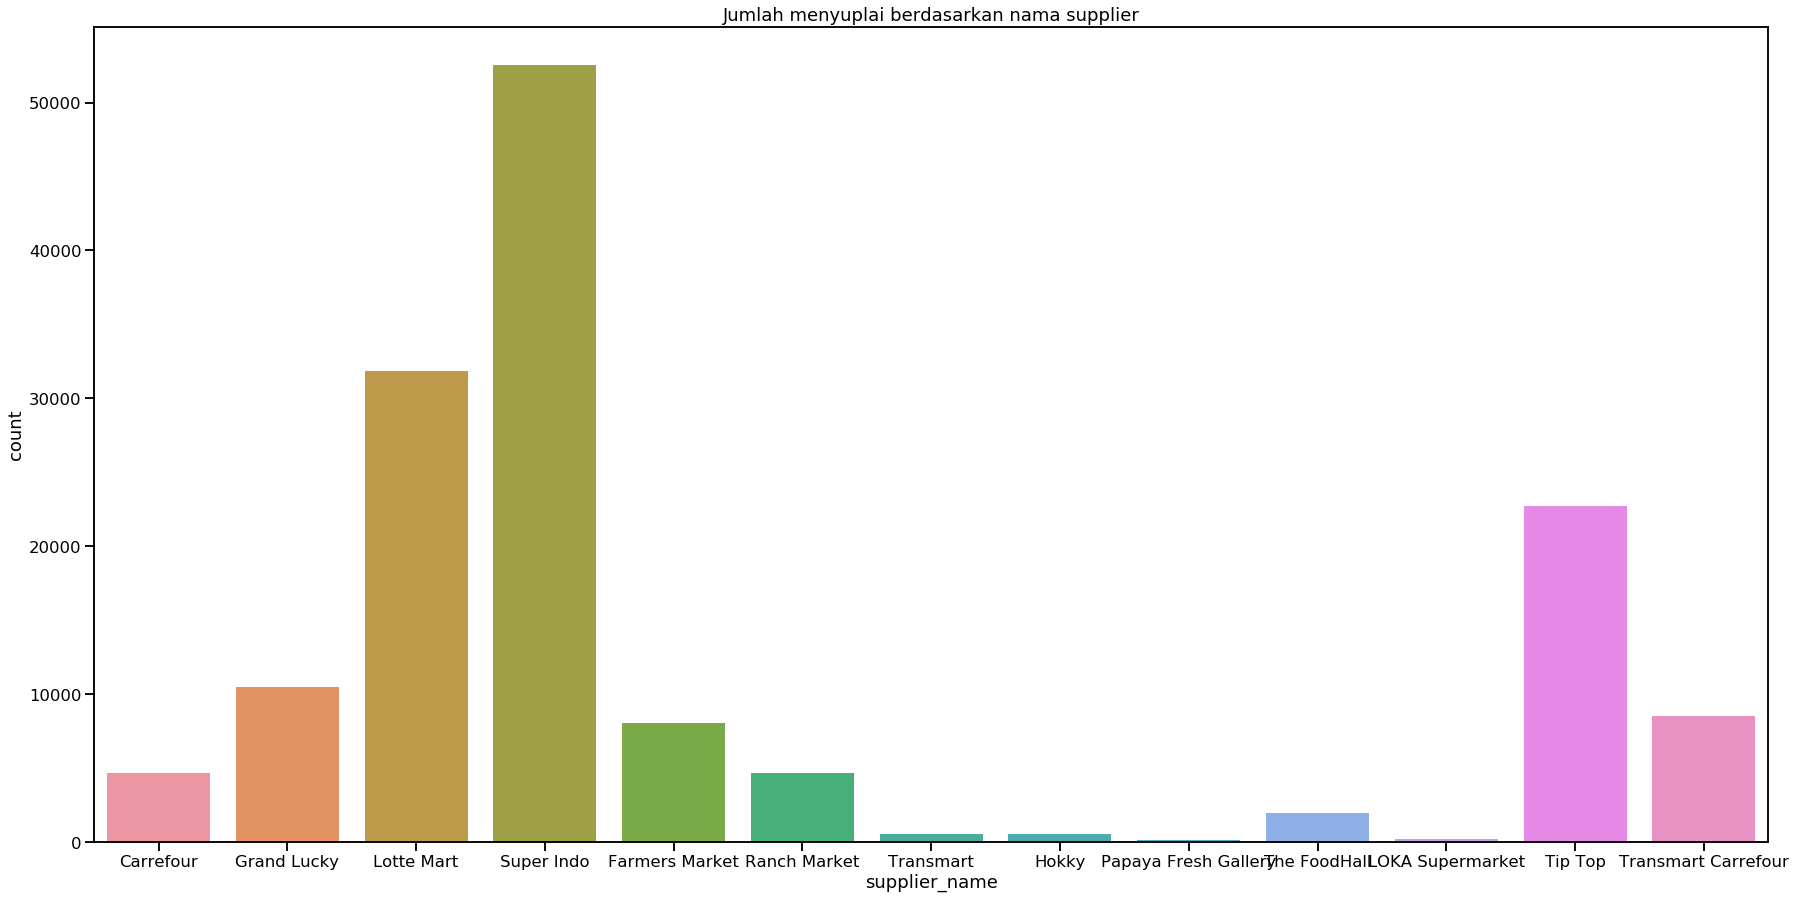

In [13]:
fig, ax = plt.subplots(figsize=(30, 15))
plt.title('Jumlah menyuplai berdasarkan nama supplier')
sns.countplot(df_new['supplier_name'],data=df_new)

(array([    0.,   302.,  5040., 33150., 25574.,  5339.,  1686.,     0.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80]),
 <a list of 8 Patch objects>)

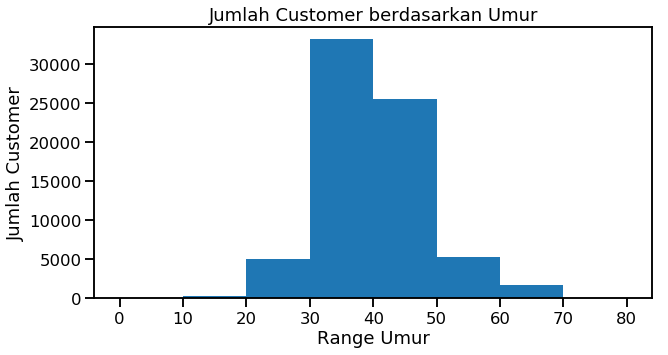

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Jumlah Customer berdasarkan Umur')
plt.xlabel('Range Umur')
plt.ylabel('Jumlah Customer')
plt.hist(df['max_age'], bins=[0,10,20,30,40,50,60,70,80])

# Melihat Insight dari transaksi perbulan

In [15]:
revenue = df_new.groupby(['year', 'month'])['final_price'].sum().reset_index()
transaction = df_new.groupby(['year', 'month'])['order_id'].count().reset_index()
customer = df_new.groupby(['year', 'month'])['customer_id'].nunique().reset_index()
unitsold = df_new.groupby(['year', 'month'])['delivered_quantity'].sum().reset_index()
averagebasket = df_new.groupby(['year', 'month']).apply(lambda x: x['delivered_quantity'].sum()/x['order_id'].nunique()).reset_index()

### Merge revenue, transaction, customer, unit sold, average basket  dengan Dataframe perbulan

In [16]:
date_month = date.drop(['date'], axis=1)
date_month = pd.merge(date_month,revenue, how='left')
date_month = pd.merge(date_month,transaction, how='left')
date_month = pd.merge(date_month,customer, how='left')
date_month = pd.merge(date_month,unitsold, how='left')
date_month = pd.merge(date_month,averagebasket, how='left')
date_month = date_month.rename(columns={'delivered_quantity': "Unit Sold", 'final_price':'Revenue',
                                              'customer_id':'Customer','order_id':'Transaction',
                                              0: "Average Basket Size"})
date_month = date_month.fillna(0)
date_month = date_month.sort_values(by=['year','month'])
date_month = date_month.reset_index()
date_month = date_month.drop(['index','dummy'], axis=1)
date_month = date_month.drop_duplicates()
date_month

,month,year,Revenue,Transaction,Customer,Unit Sold,Average Basket Size
0,4,2018,5.008484e+08,7273,3079,14154,2.920157
30,5,2018,3.861066e+08,6793,3049,13228,2.804919
61,6,2018,3.778159e+08,6222,2847,12067,2.818734
91,7,2018,4.698480e+08,7086,3234,14289,3.008844
122,8,2018,5.302452e+08,8576,3591,18842,3.427688
153,9,2018,6.763128e+08,9789,5028,24558,3.671950
183,10,2018,1.000343e+09,14839,7483,29338,2.972743
214,11,2018,1.111154e+09,18896,9404,35279,2.830926
244,12,2018,1.140942e+09,18932,9581,31652,2.483484
275,1,2019,1.181087e+09,20291,9474,36433,2.727838


<ul>
    <li>Revenue adalah Total penghasilan yang didapatkan dari setiap bulannya</li>
    <li>Transaction adalah Jumlah transaksi dari setiap bulannya</li>
    <li>Customer adalah Jumlah Customer yang membeli perbulannya</li>
    <li>Unit Sold adalah Jumlah Unit yang terjual perbulannya</li>
    <li>Average Basket Size adalah Rata-rata pembelian unit pada 1 ID Transaksi perbulannya</li>
</ul>

# Melihat Insight dari transaksi perbulan dan perkategori-brand

### Merge Dataframe tanggal dengan Dataframe Category-Brand

In [17]:
date_catbrand = pd.merge(date, catbrand, how='inner')
date_catbrand = date_catbrand.drop(['dummy'], axis=1)
date_catbrand.head(5)

,date,month,year,Category,Brand
0,2018-04-01,4,2018,Baby,Cussons
1,2018-04-01,4,2018,Beverages,Kapal Api
2,2018-04-01,4,2018,Home Care,Rinso
3,2018-04-01,4,2018,Home Care,Attack
4,2018-04-01,4,2018,Home Care,SoKlin


In [18]:
date_catbrand.shape

(48776, 5)

_Dataframe hasil gabungan dari tanggal dengan Category-Brand memiliki row sejumlah 48776, yang berarti hasil perkalian dari row tanggal (364 row) dengan row Category-Brand (134 row). Jadi, setiap tanggal memiliki Category-Brand secara keseluruhan._

In [19]:
revenue2 = df_new.groupby(['year', 'month','Category','Brand'])['final_price'].sum().reset_index()
transaction2 = df_new.groupby(['year', 'month','Category','Brand'])['order_id'].count().reset_index()
customer2 = df_new.groupby(['year', 'month','Category','Brand'])['customer_id'].nunique().reset_index()
unitsold2 = df_new.groupby(['year', 'month','Category','Brand'])['delivered_quantity'].sum().reset_index()
averagebasket2 = df_new.groupby(['year', 'month','Category','Brand']).apply(lambda x: x['delivered_quantity'].sum()/x['order_id'].nunique()).reset_index()

### Merge revenue, transaction, customer, unit sold, average basket  dengan Dataframe Tanggal-Category-Brand

In [20]:
date_catbrand = date_catbrand.drop(['date'], axis=1)
date_catbrand = pd.merge(date_catbrand,revenue2, how='left')
date_catbrand = pd.merge(date_catbrand,transaction2, how='left')
date_catbrand = pd.merge(date_catbrand,customer2, how='left')
date_catbrand = pd.merge(date_catbrand,unitsold2, how='left')
date_catbrand = pd.merge(date_catbrand,averagebasket2, how='left')
date_catbrand = date_catbrand.rename(columns={'delivered_quantity': "Unit Sold", 'final_price':'Revenue',
                                              'customer_id':'Customer','order_id':'Transaction',
                                              0: "Average Basket Size"})
date_catbrand = date_catbrand.fillna(0)
date_catbrand = date_catbrand.sort_values(by=['year','month','Category','Brand'])
date_catbrand = date_catbrand.reset_index()
date_catbrand = date_catbrand.drop(['index'], axis=1)
date_catbrand = date_catbrand.drop_duplicates()
date_catbrand.head()

,month,year,Category,Brand,Revenue,Transaction,Customer,Unit Sold,Average Basket Size
0,4,2018,Baby,Baby Sebamed,0.0,0.0,0.0,0.0,0.000
30,4,2018,Baby,Bagus,0.0,0.0,0.0,0.0,0.000
60,4,2018,Baby,Choice L,0.0,1.0,1.0,0.0,0.000
90,4,2018,Baby,Clio,52300.0,6.0,4.0,11.0,2.750
120,4,2018,Baby,Cotton Tree,3267500.0,67.0,43.0,147.0,2.625


<ul>
    <li>Revenue adalah Total penghasilan yang didapatkan dari setiap Category-Brand perbulannya</li>
    <li>Transaction adalah Jumlah transaksi dari setiap Category-Brand perbulannya</li>
    <li>Customer adalah Jumlah Customer yang membeli Category-Brand perbulannya</li>
    <li>Unit Sold adalah Jumlah Unit Category-Brand yang terjual perbulannya</li>
    <li>Average Basket Size adalah Rata-rata pembelian unit Category-Brand pada 1 ID Transaksi perbulannya</li>
</ul>

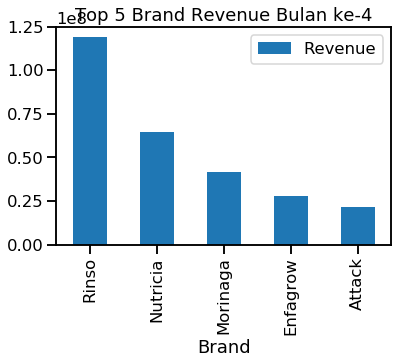

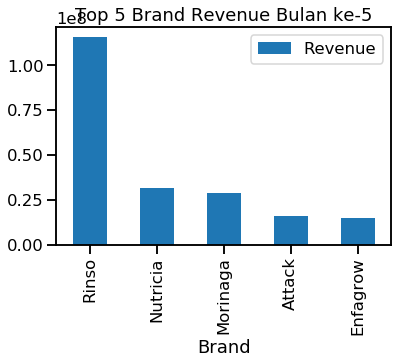

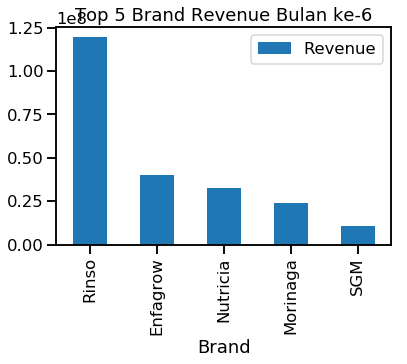

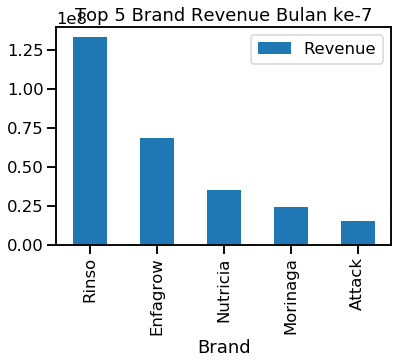

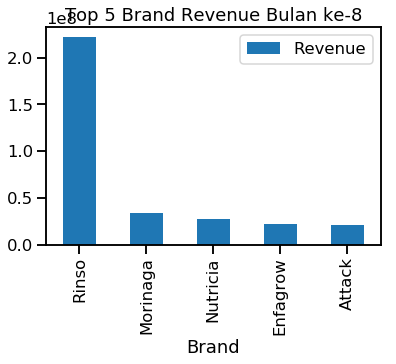

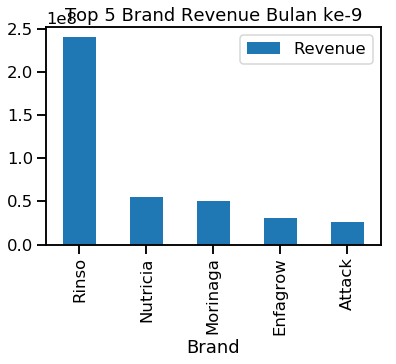

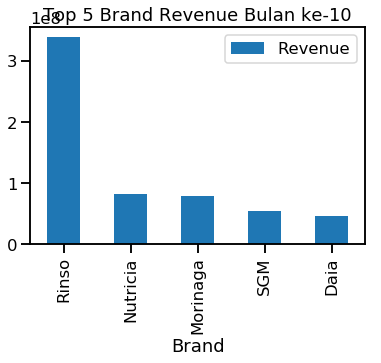

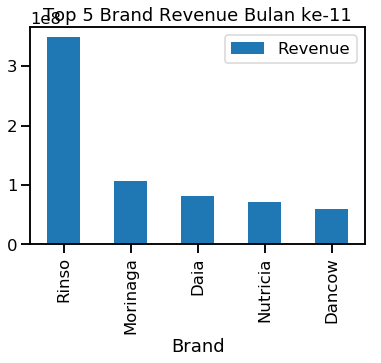

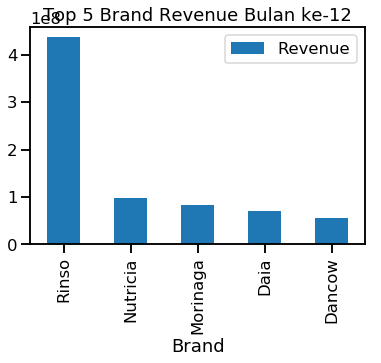

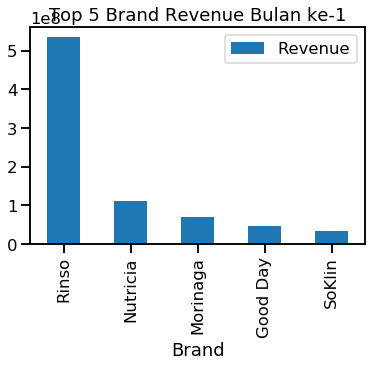

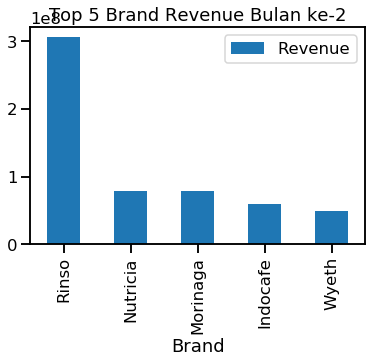

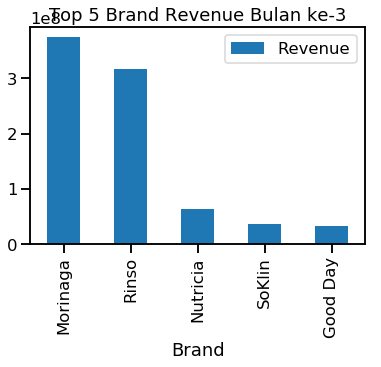

In [21]:
for i in date_catbrand['month'].unique():
    date_catbrand.where(date_catbrand['month']==i).groupby(['Brand','year', 'month'])['Revenue'].sum().reset_index().sort_values(by=['Revenue'], ascending=False).head(5).plot.bar(x='Brand', y='Revenue')
    plt.title('Top 5 Brand Revenue Bulan ke-'+ str(i))

# Melihat kombinasi antar brand per ID Order

### Membuat Dataframe Brand

In [22]:
brand = df_new[['Brand','order_id']].reset_index()
brand = brand.drop('index', axis=1)
brand.head()

,Brand,order_id
0,Cussons,3885076
1,Kapal Api,4951986
2,Rinso,4565982
3,Rinso,4909903
4,Kapal Api,2301357


### Membuat DataFrame Kombinasi Brand-Brand per ID Order dan menghitung jumlah kombinasinya

In [23]:
brand_combine = pd.merge(brand,brand, on='order_id')
brand_combine = brand_combine[['order_id','Brand_x','Brand_y']]
brand_combine = brand_combine.rename(columns={'Brand_x':'Brand_1','Brand_y':'Brand_2'})

In [24]:
brand_combine = brand_combine.loc[(brand_combine.loc[0,'order_id']==brand_combine.loc[1,'order_id'])&(brand_combine['Brand_1']!=brand_combine['Brand_2'])].reset_index(drop=True)
brand_combine['count'] = 1
brand_combine.head()

,order_id,Brand_1,Brand_2,count
0,3885076,Cussons,Nutrilon,1
1,3885076,Nutrilon,Cussons,1
2,2301357,Kapal Api,Rinso,1
3,2301357,Rinso,Kapal Api,1
4,4917131,Rinso,Cussons,1


In [25]:
brand_combine.groupby(['Brand_1', 'Brand_2'])['count'].sum().reset_index().sort_values(by=['count'], ascending=False).head(10)

,Brand_1,Brand_2,count
2135,Rinso,Daia,2402
560,Daia,Rinso,2402
2383,SoKlin,Rinso,2058
2194,Rinso,SoKlin,2058
458,Cussons,Rinso,1665
2133,Rinso,Cussons,1665
565,Daia,SoKlin,1253
2343,SoKlin,Daia,1253
2162,Rinso,Luwak,1109
1344,Luwak,Rinso,1109


_Dari Dataframe diatas, dapat diketahui bahwa Brand yang sering dibeli secara bersamaan, yaitu :_ 
<ul> 
    <li>Rinso dengan Daia</li>
    <li>SoKlin dengan Rinso</li>
    <li>Cussons dengan Rinso</li>
    <li>Daia dengan SoKlin</li>
    <li>Rinso dengan Luwak</li>
</ul>

# Melihat Category Brand yang jumlah transaksinya tertinggi

In [26]:
catcount = df_new.groupby(df_new['Category'])['order_id'].nunique().reset_index()
catcount = catcount.sort_values(by=['order_id'], ascending=False).reset_index(drop=True)
catcount = catcount.rename(columns={'order_id':'count_order'})
catcount

,Category,count_order
0,Home Care,60423
1,Beverages,19736
2,Baby,15892
3,Dairy,13960
4,Health Care,190


_Category Brand yang sering dibeli pada tiap transaksi yaitu Home Care_

# Melihat jumlah transaksi per category-brand-bulan

In [27]:
date_catbrand.groupby(by=['month','Category','Brand'])['Transaction'].sum().reset_index()

,month,Category,Brand,Transaction
0,1,Baby,Baby Sebamed,0.0
1,1,Baby,Bagus,0.0
2,1,Baby,Choice L,0.0
3,1,Baby,Clio,0.0
4,1,Baby,Cotton Tree,52.0
5,1,Baby,Cussons,748.0
6,1,Baby,Day 2 Day,12.0
7,1,Baby,Dettol,120.0
8,1,Baby,JF,2.0
9,1,Baby,Jempol,6.0


In [28]:
table_transaction_brand = pd.pivot_table(date_catbrand, values='Transaction', index=['Category', 'Brand'], 
                       columns=[date_catbrand.month], aggfunc='sum', fill_value=0)
table_transaction_brand = table_transaction_brand.rename(columns={1: "Jan 2019",2: "Feb 2019",3: "Mar 2019",4: "Apr 2018",5: "Mei 2018",6: "Jun 2018",
                             7: "Jul 2018",8: "Agu 2018",9: "Sep 2018",10: "Okt 2018",11: "Nov 2018",12: "Des 2018",})

In [29]:
table_transaction_brand

month                            Jan 2019  Feb 2019  Mar 2019  Apr 2018  \
Category    Brand                                                         
Baby        Baby Sebamed                0         0         3         0   
            Bagus                       0         0         0         0   
            Choice L                    0         0         0         1   
            Clio                        0         2         2         6   
            Cotton Tree                52        53        53        67   
            Cussons                   748       623       792       381   
            Day 2 Day                  12        12         7        11   
            Dettol                    120       111       135       112   
            JF                          2         0         4         0   
            Jempol                      6         3         0         3   
            Lotte Mart                  0         0         0         2   
            Lotte Mart Jempol           0         1         1         1   
            MamyPoko                  136       123       150       157   
            Mitu                      319       363       438       154   
            Mitu Baby                 236        46        58       122   
            My Baby                     2         0         6         2   
            Neppi                       1         2         2         0   
            Paseo                     278       231       310        73   
            Pigeon                    100        87       104        53   
            Pure Baby                   3        10         7         3   
            Super Indo 365             10         8         5         6   
            Sweety                     30        24        41         0   
            Wetties                     2         5         4         4   
            Zwitsal                     2         3         1         0   
Beverages   ABC                       226       172       181       112   
            Ah Huat                     0         0         0         1   
            Aik Cheong                  1         7         4         5   
            Anget Sari                  2         4         4         2   
            BOH                         0         0         0         0   
            CNI                         1         0         0         0   
            Cafela                      0         0         1         1   
            Caffe D'Vita                0         0         0         0   
            Ceres Super                 0         0         0         0   
            ChekHup                    20        10         7         6   
            Choice L                    0         0         2         3   
            Club House                  0         0         0         0   
            Coffee 7                    0         2         0         0   
            Del Monte                   1         2         3         1   
            Dydo                        0         0         1         0   
            Esprecielo                  4         2         3         4   
            Exotico                     1         0         0         1   
            Fresco                     31        14        26        15   
            Gold Choice                 0         0         0         0   
            Golda Coffee               12        10        11         0   
            Good Day                 1121       635       685       310   
            Herbadrink                  0         0         0         0   
            Indocafe                  691       949       346       148   
            JJ Royal                    8         6         0         4   
            Javabica                    1         1         2         1   
            Kapal Api                 135       108       122        86   
            Kopiko                     38        30        35        25   
            Kopiko 78C   

<ul>
    <li>Product Luwak pada bulan Juni 2018 mengalami penurunan dari rata-rata perbulannya.</li>
    <li>Product Good Day pada bulan Januari 2019 mengalami kenaikan signifikan dari rata-rata perbulannya.</li>
    <li>Product Morinaga pada bulan Maret 2019 mengalami kenaikan signifikan dari rata-rata perbulannya.</li>
    <li>Product Wyeth pada bulan Februari 2019 mengalami kenaikan signifikan dari rata-rata perbulannya.</li>
    <li>Product Rinso terhitung stabil penjualan perbulannya.</li>
</ul>

Kesimpulan
<ul>
    <li>Menurut saya, product mengalami penurunan, mungkin dikarenakan product saingan dari Product tersebut sedang ada promo, sehingga banyak yang beli product saingannya.</li>
    <li>Menurut saya, product mengalami kenaikan, mungkin dikarenakan product sedang mengadakan promo yang cukup membuat customer tertarik.</li>
    <li>Menurut saya, product yang stabil penjualannya, mungkin dikarenakan product tersebut memiliki customer yang sangat loyal.</li>
</ul>

# Melihat jumlah customer setia dan tidak

### Mengambil data 6 bulan terakhir

In [30]:
table_customer = pd.pivot_table(df_new, values='order_id', index=['customer_id'], 
                       columns=[date_catbrand.month], aggfunc='nunique', fill_value=0)
table_customer = table_customer.drop(columns=[4,5,6,7,8,9])
table_customer = table_customer.reset_index()
table_customer['current_period'] = table_customer[1]+table_customer[2]+table_customer[3]
table_customer['prev_period'] = table_customer[10]+table_customer[11]+table_customer[12]
table_customer = table_customer.drop(columns={1,2,3,10,11,12})

In [31]:
conditions = [
    (table_customer['prev_period']>0) & (table_customer['current_period']==0),
    (table_customer['prev_period']==0) & (table_customer['current_period']>0),
    (table_customer['prev_period']>0) & (table_customer['current_period']>0)]
choices = ['Lapsing', 'New', 'Loyal']
table_customer['label'] = np.select(conditions, choices)

In [32]:
table_customer.head()

month,customer_id,current_period,prev_period,label
0,209,0,0,0
1,292,0,0,0
2,946,1,1,Loyal
3,978,0,1,Lapsing
4,1917,1,0,New


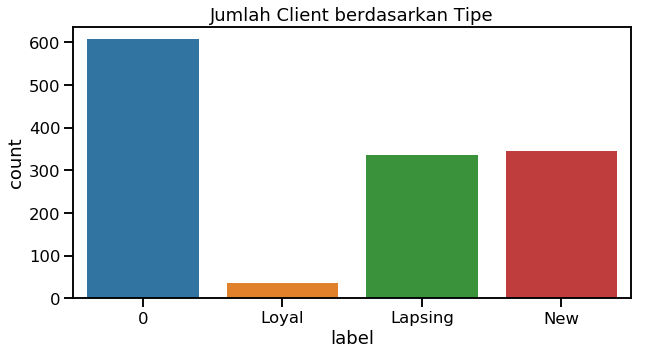

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Jumlah Client berdasarkan Tipe')
sns.countplot(table_customer['label'],data=table_customer)

_Dari data tersebut, saya mengambil data 6 bulan terakhir, yang dibagi menjadi 2 periode (current dan prev), prev period adalah 3 bulan pertama, dan current period adalah 3 bulan kedua._

<ul>
    <li>0 adalah pelanggan yang tidak membeli apapun pada prev period maupun current period</li>
    <li>Loyal adalah pelanggan setia yang selalu membeli pada prev period maupun current period</li>
    <li>Lapsing adalah pelanggan yang membeli hanya pada prev period, tetapi tidak membeli pada current period</li>
    <li>New adalah pelanggan yang baru membeli pada current period</li>
</ul>

# Melihat Jumlah transaksi yang menggunakan diskon di tiap productnya

In [34]:
df_new[(df_new['product_normal_price']*df_new['delivered_quantity']>df_new['final_price'])&(df_new['product_normal_price'].notna())&(df_new['final_price'].notna())]['order_id'].nunique()

46152

_Terdapat perbedaan harga awal dan final pada 46152 Transaksi, mungkin dikarenakan adanya diskon pada product tersebut._

# Kesimpulan

Dari hasil eksplorasi diatas, dapat menampilkan :
<ul>
    <li>Jumlah Customer berdasarkan variabel tertentu (contoh : gender, tipe aplikasi, umur, daerah)</li>
    <li>Jumlah Supplier tertinggi</li>
    <li>Insight dari transaksi perbulan maupun perbulan-category-brand (Revenue, transaction, customer, unit sold, average basket)</li>
    <li>Top 5 Brand perbulan</li>
    <li>Kombinasi antar brand yang sering dibeli secara bersamaan</li>
    <li>Kenaikan atau penurunan pembelian product perbulan</li>
    <li>Jumlah Customer Setia dan Tidak di 6 bulan terakhir</li>
    <li>Jumlah transaksi yang menggunakan diskon di tiap productnya</li>
</ul>

In [35]:
date_catbrand2 = pd.merge(date,catbrand)
date_catbrand2 = date_catbrand2.drop(columns=['month','year','dummy'])

In [36]:
date_catbrand2

,date,Category,Brand
0,2018-04-01,Baby,Cussons
1,2018-04-01,Beverages,Kapal Api
2,2018-04-01,Home Care,Rinso
3,2018-04-01,Home Care,Attack
4,2018-04-01,Home Care,SoKlin
5,2018-04-01,Beverages,OldTown
6,2018-04-01,Dairy,SGM
7,2018-04-01,Baby,Paseo
8,2018-04-01,Dairy,Dancow
9,2018-04-01,Baby,Mitu


In [37]:
transaction3 = df_new.groupby(['order_delivered_date','Category','Brand'])['final_price'].sum().reset_index()
transaction3 = transaction3.rename(columns={'order_delivered_date':'date','final_price':'revenue'})

In [38]:
date_catbrand2 = pd.merge(date_catbrand2, transaction3, on=['Category','Brand'])

In [39]:
date_catbrand2 = date_catbrand2.drop(columns='date_x')
date_catbrand2 = date_catbrand2.rename(columns={'date_y':'date'})
date_catbrand2 = date_catbrand2[['date','Category','Brand','revenue']]
date_catbrand2.head()

,date,Category,Brand,revenue
0,2018-04-01,Baby,Cussons,572840.0
1,2018-04-02,Baby,Cussons,292240.0
2,2018-04-03,Baby,Cussons,316270.0
3,2018-04-04,Baby,Cussons,232230.0
4,2018-04-05,Baby,Cussons,512190.0


In [43]:
date_catbrand2 = date_catbrand2.set_index('date')

In [44]:
date_catbrand2.head()

,Category,Brand,revenue
date,,,
2018-04-01,Baby,Cussons,572840.0
2018-04-02,Baby,Cussons,292240.0
2018-04-03,Baby,Cussons,316270.0
2018-04-04,Baby,Cussons,232230.0
2018-04-05,Baby,Cussons,512190.0


In [41]:
transaction3.shape

(14741, 4)